In [170]:
# AAOAK9.py
# UC Davis BIM110B 
# Winter 2023
# Group 5: Anisha Kumar, Jasmine Rose Muolic, Blanca Osorio, Marc Ramirez, Emely Rivera 
# Automattic Assessment of Osteoarthritis in Canine Elbows
# Marc's Version 1
import cv2
import pydicom as dicom
import numpy as np
# import matplotlib as mp
# plt = mp.pyplot
# imread, imshow, show, subplot, title, get_cmap, hist
import skimage
# use code below to show the image
# plt.imshow(insertImagePixelArrayHere,cmap=plt.cm.gray)
from matplotlib.pyplot import imread, imshow, show, subplot, title, hist, cm

In [171]:
# R1
path = r'/Users/marcramirez/Desktop/AAOAK9/Anonymous Rad Pt 2/R1/Elbow_Lf_Rf - 145421/Right_Fore_CR_CD_Extremity_10/IM-0003-0001.dcm'

original image


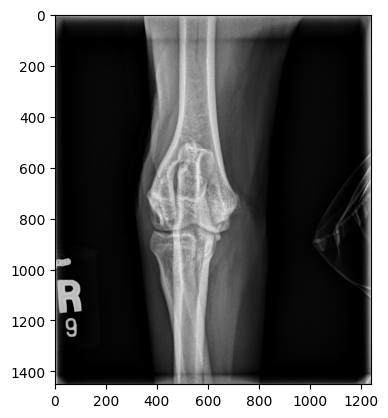

In [172]:
## pydicom
R1_RF_CRCD = dicom.dcmread(path)
pixelsR1_RF_CRCD = R1_RF_CRCD.pixel_array
m, n = np.shape(pixelsR1_RF_CRCD) # preset dimensions of the radiogrpah when opening them, will help to make code universal for
                                  # different sized radiograph inputs
print('original image')
imshow(pixelsR1_RF_CRCD,cmap=cm.gray)

In [173]:
# Intensity Thresholding
def intesityThresh(image,m,n,r2,r1=0): # image = pixels of the image
                                       # m = # of rows
                                       # n = # of columns
                                   # r2 = upper bound threshold
                                   # r1 = lower bound threshold, defaulted to 0 if no input
    thresh = image
    for i in range(0,m):
        for j in range (0,n):
            if image[i][j] >= r1 and image[i][j] <= r2:
                thresh[i][j] = 0
    return thresh
# Apply a filter N times
def applyNTimes(filt,image,n=1): # filt = filter used
                                 # image = pixels of the image
                                 # n = how many times to apply the filter
    index = 1
    medianImage = filt(image)
    while index < n:
        medianImage = filt(medianImage)
        index += 1
    return medianImage

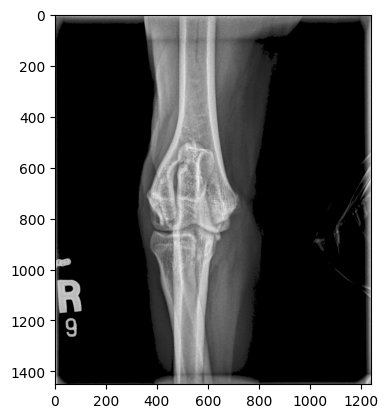

In [162]:
#Intesity thresholding # works to eliminate lower threshold values but messes with the rest of the outputs at least on my computer
# Uncomment section bellow if you want to see what it would look like
# intThreshR1_RF_CRCD = intesityThresh(pixelsR1_RF_CRCD,m,n,500)
# imshow(intThreshR1_RF_CRCD, cmap = cm.gray)

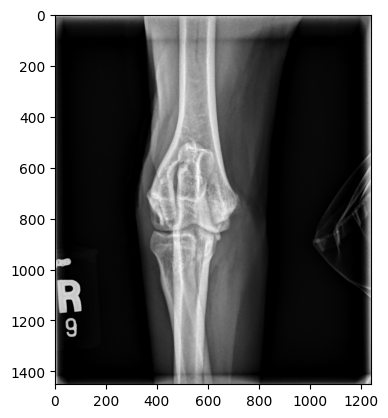

In [174]:
# Median Filter, does not do anything, takes 17.2 s with N = 100
medianR1_RF_CRCD = applyNTimes(skimage.filters.median,pixelsR1_RF_CRCD,10) # no real diffrence, maybe at the pixel level the intensity values
                                                           # chnage but overall same output
imshow(medianR1_RF_CRCD, cmap = cm.gray)

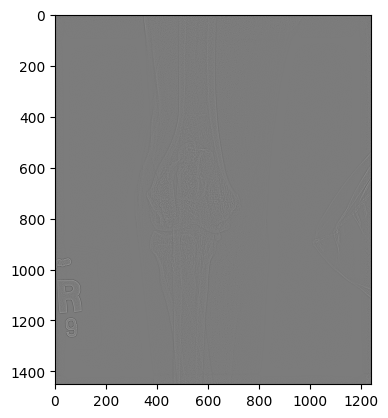

In [175]:
# Laplacian
laplacianR1_RF_CRCD = applyNTimes(skimage.filters.laplace,pixelsR1_RF_CRCD,1)
imshow(laplacianR1_RF_CRCD,cmap = cm.gray)
# on its own comes out blurry but what about intensity thresholding
# imshow(,cmap = cm.gray)

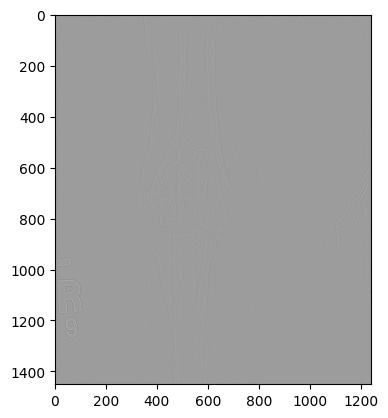

In [176]:
# Laplacian w/ intesity thresholding
laplaThreshR1_RF_CRCD = applyNTimes(skimage.filters.laplace,intThreshR1_RF_CRCD,1)
imshow(laplaThreshR1_RF_CRCD,cmap = cm.gray)

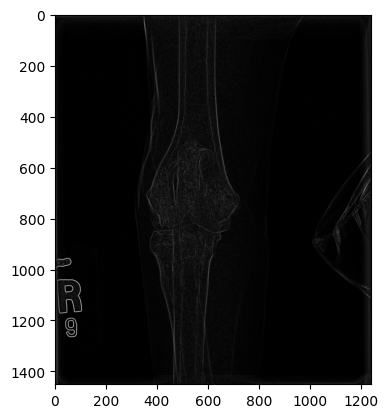

In [177]:
#Sobel Filter
edgesR1_RF_CRCD = skimage.filters.sobel(pixelsR1_RF_CRCD)
imshow(edgesR1_RF_CRCD,cmap=cm.gray) 

In [154]:
#Histogram Equalization with subplot, takes 1m 26.3 s
# Uncomment section bellow if you want to see what it would look like
#origHistogramR1_RF_CRCD = hist(pixelsR1_RF_CRCD)
#histeqR1_RF_CRCD = skimage.exposure.equalize_hist(pixelsR1_RF_CRCD)
#newHist = hist(histeqR1_RF_CRCD)
#subplot(221); imshow(pixelsR1_RF_CRCD, cmap=cm.gray); title('Original')
#subplot(222); hist(pixelsR1_RF_CRCD); title('Histogram of Original')
#subplot(223); imshow(histeqR1_RF_CRCD, cmap=cm.gray); title('Histogram Equalized')
#subplot(224); hist(histeqR1_RF_CRCD); title('Histogram of the Equalized Image')
#show()
# from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist, cm

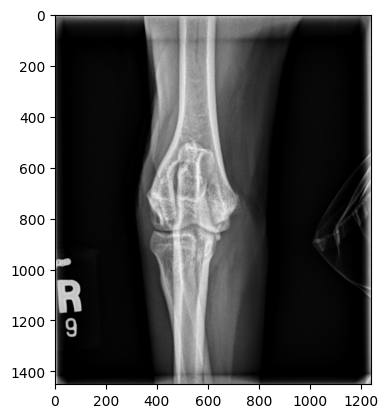

In [178]:
# Gaussian
gaussR1_RF_CRCD = skimage.filters.gaussian(pixelsR1_RF_CRCD,1)
imshow(gaussR1_RF_CRCD,cmap = cm.gray)

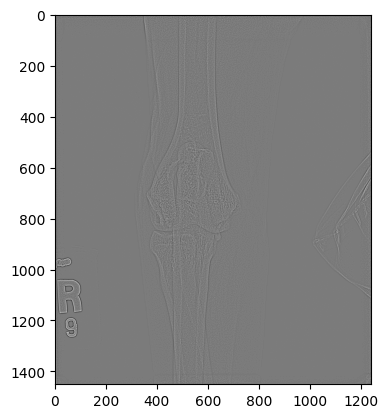

In [179]:
# hold on wiener, different for python
# Laplacian of Gaussian
loGR1_RF_CRCD = skimage.filters.laplace(gaussR1_RF_CRCD)
imshow(loGR1_RF_CRCD,cmap = cm.gray)

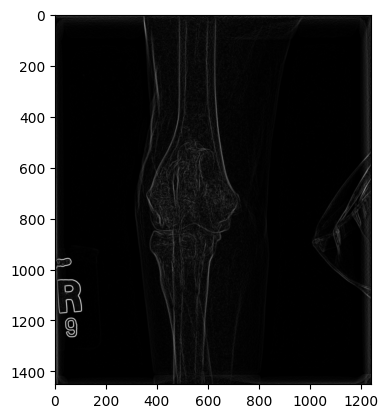

In [180]:
#SoG: Sobel of Gaussian
soGR1_RF_CRCD = skimage.filters.sobel(gaussR1_RF_CRCD)
imshow(soGR1_RF_CRCD,cmap = cm.gray)